# Matplotlib

In [1]:
import matplotlib.pyplot as plt

### Basic charts

![](https://res.cloudinary.com/codecrucks/image/upload/c_scale,w_700,h_327,dpr_2/f_webp,q_auto/v1648958444/chart-types.png?_i=AA)

### Chart selection roadmap

![](http://blog.atkcg.ru/wp-content/uploads/2015/07/1-%D0%B9-%D1%81%D0%BB%D0%B0%D0%B9%D0%B41.jpg)

Из чего состоит график:

![image.png](https://blog.logrocket.com/wp-content/uploads/2021/11/anatomy-figure.png)

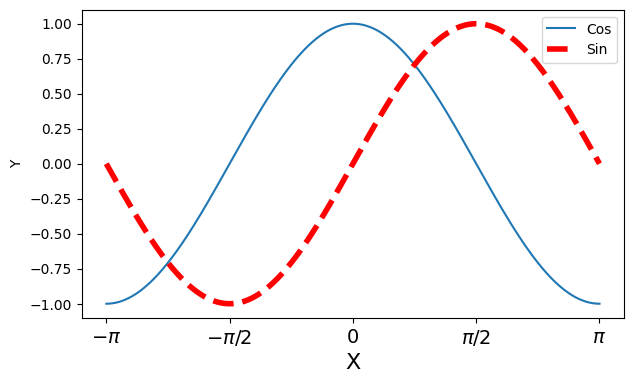

In [ ]:
import numpy as np

plt.figure(figsize=(7, 4))
X = np.linspace(-np.pi, np.pi, 1000)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, label='Cos')
plt.plot(X, S, label='Sin', c='r', linestyle='--', linewidth=4)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y')
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', 0, r'$\pi/2$', r'$\pi$'], fontsize=14)
plt.legend()
plt.show()

# Homework

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')``` and do the following exercises **without for-loops**.


Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
my_array = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')
year = my_array[0:,0]
hare = my_array[0:,1]
lynx = my_array[0:,2]
carrot = my_array[0:,3]

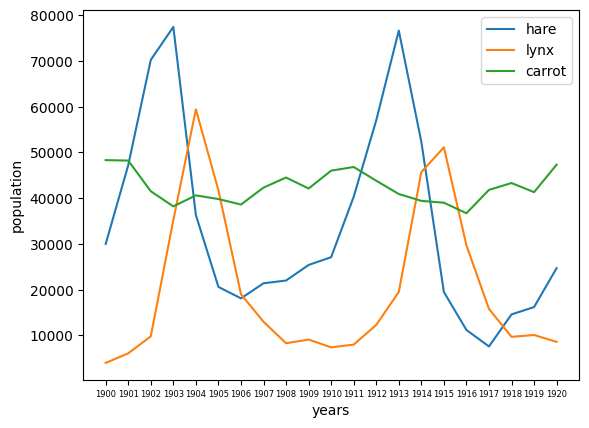

In [ ]:
plt.plot(year, hare, label='hare')
plt.plot(year, lynx, label='lynx')
plt.plot(year, carrot, label='carrot')
plt.xticks(ticks = year,fontsize =6)
plt.xlabel("years")
plt.ylabel("population")
plt.legend()
plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

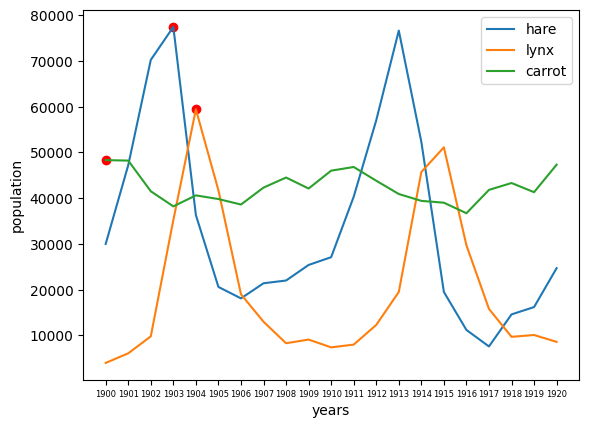

In [ ]:
m_hare = year[np.where(hare == max(hare))]
m_lynx = year[np.where(lynx == max(lynx))]
m_carrot = year[np.where(carrot == max(carrot))]


plt.plot(year, hare, label='hare')
plt.plot(year, lynx, label='lynx')
plt.plot(year, carrot, label='carrot')
plt.xticks(ticks = year,fontsize =6)
plt.xlabel("years")
plt.ylabel("population")
plt.legend()
plt.scatter([m_hare, m_lynx, m_carrot], [max(hare), max(lynx), max(carrot)], color='red')
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

<BarContainer object of 21 artists>

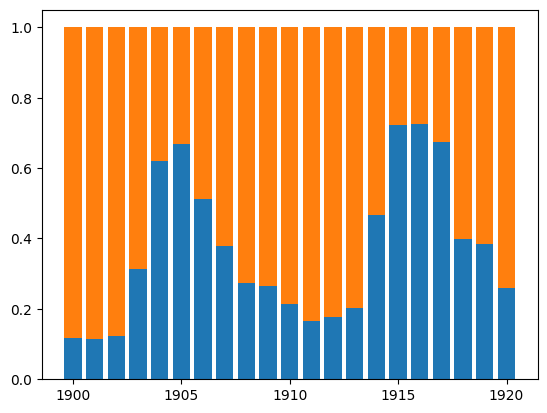

In [ ]:
plt.bar(year, lynx/(hare+lynx))
plt.bar(year, hare/(hare+lynx), bottom = lynx/(hare+lynx))

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

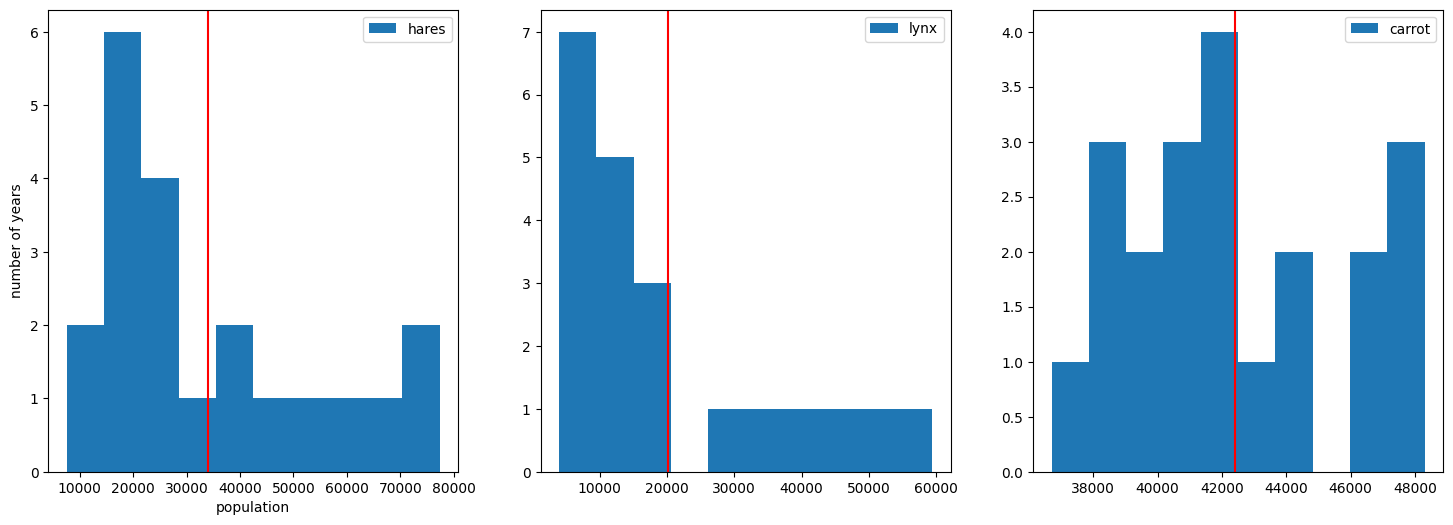

In [ ]:
plt.figure(figsize=(18, 6))
mean_hare = sum(hare)/len(hare)
mean_lynx = sum(lynx)/len(lynx)
mean_carrot = sum(carrot)/len(carrot)
std_hare = sum(hare**2)/len(hare) - mean_hare**2
std_lynx = sum(lynx**2)/len(lynx) - mean_lynx**2
std_carrot = sum(carrot**2)/len(carrot) - mean_carrot**2
ax1 = plt.subplot(1, 3, 1)
ax1.hist(hare,label = "hares")
ax1.legend()
ax1.set_ylabel('number of years')
ax1.set_xlabel('population')
plt.axvline(mean_hare, color = 'red')
ax2 = plt.subplot(1, 3, 2)
ax2.hist(lynx, label = "lynx")
ax2.legend()
ax1.set_ylabel('number of years')
ax1.set_xlabel('population')
plt.axvline(mean_lynx, color = 'red')
ax3 = plt.subplot(1, 3, 3)
ax3.hist(carrot, label = "carrot")
ax3.legend()
ax1.set_ylabel('number of years')
ax1.set_xlabel('population')
plt.axvline(mean_carrot, color = 'red')
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['L' 'L' 'L' 'L' 'H' 'H' 'H' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'H' 'H' 'H'
 'L' 'L' 'L']


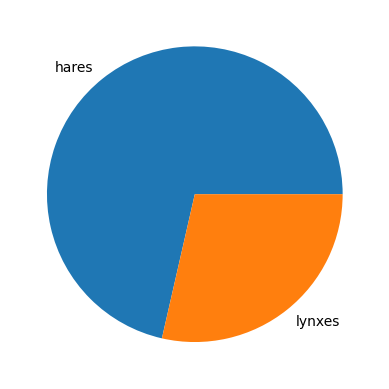

In [ ]:
HorL = hare>=lynx
n_hares = np.count_nonzero(HorL)
n_lynxes = 21-n_hares
#print(n_hares, n_lynxes)
HorL = HorL.astype(int)
HorL = HorL.astype(object)
HorL[HorL ==1] = 'L'
HorL[HorL ==0] = 'H'
print(HorL)
labels = 'hares', 'lynxes'
sizes = [n_hares,n_lynxes]
plt.pie(sizes, labels = labels)
plt.show()

Plot the change in the hare population and in the hare population for each year. Find the correlation coefficient between the both time series.

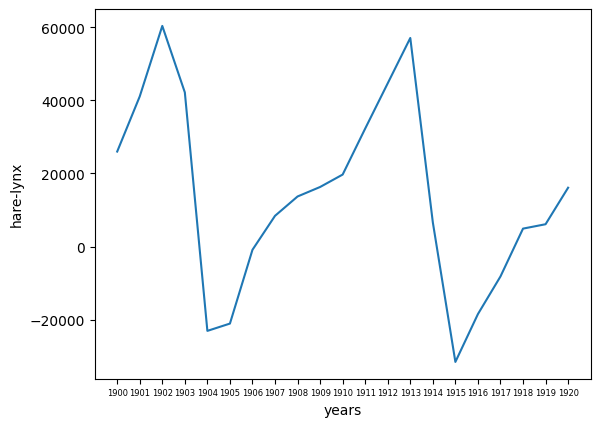

correlation is 0.07189206073535542


In [ ]:
corr_hare_lynx = (sum(hare*lynx)/(len(hare)) - mean_hare*mean_lynx)/(std_hare*std_lynx)**0.5
plt.plot(year, hare-lynx)
plt.xticks(ticks = year,fontsize =6)
plt.xlabel("years")
plt.ylabel("hare-lynx")
plt.show()
print("correlation is",corr_hare_lynx)

Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

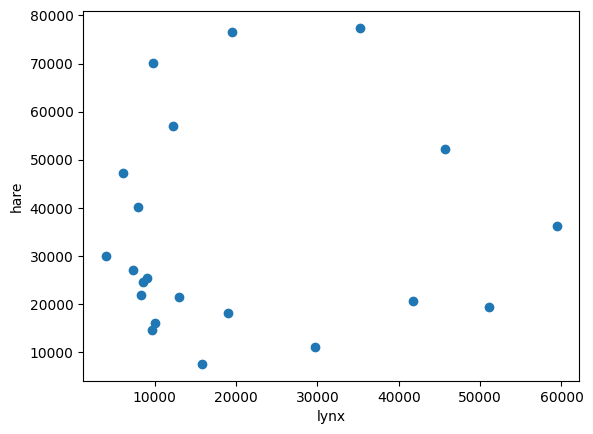

In [ ]:
plt.scatter(lynx,hare)
plt.xlabel("lynx")
plt.ylabel("hare")
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [ ]:
# hares in 1920 = mean of hares of previous 1900-1919 years
estimated_hares = (sum(hare)-hare[-1])/(len(hare)-1)
print("estimated value of hares in 1920 is", estimated_hares)
print("real value of hares in 1920 is", hare[-1])
print("error is ", abs(hare[-1]-estimated_hares)/hare[-1])

estimated value of hares in 1920 is 34550.0
real value of hares in 1920 is 24700.0
error is  0.39878542510121456


### Let's practice: k-Nearest Neighbor (kNN) classification

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/800px-KnnClassification.svg.png" width="400"/>

Описание алгоритма:
* входом алгоритма является выборка с размеченными классами (обучающая выборка), выборка с неразмеченными классами и число K
* для каждого неразмеченного элемента выбираем K ближайших элементов из обучающей выборки
* неразмеченному элементу приписываем самый частый класс из K соседей

### Датасет MNIST

Датасет MNSIT содержит примеры рукописных цифр. Загрузим датасет и посмотрим на примеры

In [2]:
from sklearn.datasets import fetch_openml

#Загрузка может занять около минуты
images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


```images``` - массив картинок размера 28х28, вытянутых в вектор размера 784. Всего в датасете 70К примеров картинок

In [3]:
images.shape

(70000, 784)

```labels``` - массив, в котором записано, какая цифра нарисована на каждой картинке картинке

In [4]:
labels.shape

(70000,)

Нарисуем пример одной из картинок:

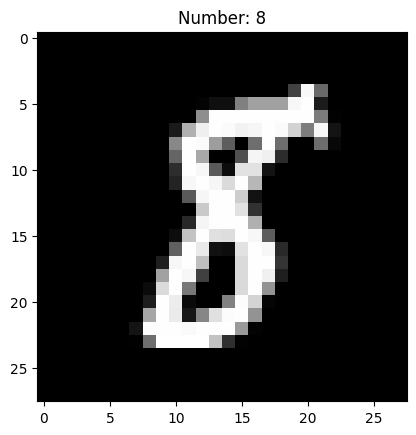

In [5]:
i = 125
plt.imshow(images[i].reshape(28, 28), cmap='Greys_r')
plt.title('Number: ' + labels[i])
plt.show()

Разделим датасет на train и test

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((49000, 784), (21000, 784), (49000,), (21000,))

Задача: написать функцию, реализующую алгоритм kNN.

Входом в функцию является
* train_X - матрица признаков обучающего датасета
* train_Y - массив классов обучающего датасета
* test_X - матрица признаков тестового датасета
* k - число соседей
    
Выход:
* массив той же длины, что и test_X, содержащий классы для тестового датасета

**Фунция должна содержать не более 1 цикла for/while!**
**Стремитесь  обойтись как можно меньшим количеством строк кода.**
    
Примените kNN на выборкe ```x_test``` из датасета MNIST для разных K. Посчитать точность классификации (accuracy - доля правильно классифицированных объектов) и выбрать оптимальное К.

In [22]:
import scipy as sp
import numpy as np
from collections import Counter
def algorithm_kNN(train_X,train_Y,test_X,k):
  results = []
  #arr_neighbourity = np.linalg.norm(train_X - test_X,axis = 1)
  arr_neighbourity = sp.spatial.distance.cdist(test_X, train_X)
  for neighbourity in arr_neighbourity:
     #тут посчитали сумму расстояний от точек одной картинки из test_X до всех точек всех картинок в test_X
    #neighbourity.sort() # отсортировали массив расстояний по возрастанию
    #k_neighbourity=neighbourity[:k] #взяли k наименьших расстояний до картинки
     #year[np.where(carrot == max(carrot))]

    #neighbouries  = train_Y[np.where(neighbourity == k_neighbourity)] #взяли k соседей с минимальными расстояниями
    neighbouries  = train_Y[np.argpartition(neighbourity, k)[:k]]
    results.append(Counter(neighbouries).most_common(1)[0][0])
  return (results)
def Accuracy(test_X, test_Y):
  accuracy = 0
  length = len(test_X)
  for i in range(length):
    if (test_X[i] == test_Y[i]):
      accuracy+=100/length
  return (accuracy)

In [30]:
k = 1
A = 100
B = 1000 #поставили эти ограничения, т.к. иначе функция algorithm_kNN очень долго работает
l=[]
#c = algorithm_kNN(x_train[:B],y_train[:B],x_test[:A],k)
#l = Accuracy(c, y_test[:A])
for i in range(1, A+1):
  #print("k = ", i, "accuracy =", Accuracy(algorithm_kNN(x_train[:B],y_train[:B],x_test[:A],i), y_test[:A]))
  l.append(Accuracy(algorithm_kNN(x_train[:B],y_train[:B],x_test[:A],i), y_test[:A]))
print ("highest accuracy is",max(l), "and k is", np.argmax(l)+1)

highest accuracy is  90.0 and k is 1


In [ ]:
a = np.array([[1,2],[2,3]])
b = np.array([[6,7],[0,0]])
print(a-b)
c =np.linalg.norm(a-b)
c1 = np.linalg.norm(a-b,axis = 1)
print(c)
print(c1)
a1 = np.array([1,2,4,7,1])
a1.sort()
print(a1)
a2=a1%2
print(a2)
a3 = np.array([5,10,15,20,25])
print(a3)
b1 = a3[np.where(a1 == a2)]
print(b1)